In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression


In [4]:
from sklearn.linear_model import LinearRegression

### The Dataset:

In [5]:
from sklearn.datasets import load_boston

The dataset we will be using for the regression task is called Boston House Prices Dataset. The dataset contains 506 observations and 13 dimensions, lets take a look:

In [6]:
boston = load_boston()
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\itayz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

<span style="font-size:2em;"> seriously?!</span>

* B        1000(Bk - 0.63)^2 where Bk is the **proportion of blacks by town**
* LSTAT    % **lower status** of the population        

well.... yes it's from the 70s

you can read more about it in this blogpost digging deeper into the dataset and this column specifically:<br>
https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8

In [7]:
X = pd.DataFrame(boston.data, columns= boston.feature_names)
y = pd.Series(boston.target)

X.merge(pd.DataFrame(y, columns = ["Target: Y"]), left_index=True, right_index=True).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target: Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


After we have seen the data and we have the some observations, we can train the data on using a linear regressor:

In [6]:
reg  = LinearRegression() #The best thing about linear regression, that we don't have ANY hyperparameter to tune :-)
reg.fit(X, y)

LinearRegression()

#### The way we predict the y for a new data is by using the following:

For each row in the new data the regressor will predict the outcome based on the way he was trained to.

In [7]:
preds = reg.predict(X)
print(preds.shape)
reg.predict(X)[:3]

(506,)


array([30.00384338, 25.02556238, 30.56759672])

As you recall, the algorithm of a linear model is just a matrix with the coefficients of each parameter:

$ y = w_0+ w_1 x_1 + w_2 x_2 + ... $ <br>
So that $w_0$ is the intercept and the $w_1$... $w_m$ are coefs.<br><br>

$b$ is a scalar <br>
$W$ is a vector of coefs with a shape of (n_features) <br>
$x$ is a matrix of inputs with a shape of (n_samples, n_features) <br>
$y$ is a vecotr of outputs with a shape of (n_samples)

<!-- In the general matter, we can create a larger coef matrix for multiple regression purposes:

$$ y = xW^T + b $$ 
So that: <br>
$b$ is a vector of intercepts with a shape of (n_regression_tasks, 1) <br>
$W$ is a matrix of coefs with a shape of (n_regression_tasks, n_features) <br>
$x$ is a matrix of inputs with a shape of (n_samples, n_features) <br>
$y$ is a matrix of outputs with a shape of (n_samples, n_regression_tasks) -->

We can take a look over these coefs in our regressor attributes:

In [8]:
W = reg.coef_
b = reg.intercept_ #Since we have only one prediction task, the shape of the W and b will be (13, ) and () = 1
print(f'W coefs: \n{W}')
print(f'W intercept: {b}','\n')
print(f'W len: {len(W)}')
print(f'b len: {b.shape}')
print(f'X len: {X.shape}')



W coefs: 
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
W intercept: 36.459488385089855 

W len: 13
b len: ()
X len: (506, 13)


In [9]:
# np.dot(X,W.transpose())+b Equivilant to reg.predict(X)

print((np.dot(X,W.transpose())+b)[:3])
print(reg.predict(X)[:3])

[30.00384338 25.02556238 30.56759672]
[30.00384338 25.02556238 30.56759672]


If we want to take a look on the coefs:

In [10]:
pd.DataFrame(W.reshape(-1, 1), columns = ["Coefficients"], index=boston.feature_names)
#Zipped them together with the relevant feature name

,Coefficients
CRIM,-0.108011
ZN,0.046420
INDUS,0.020559
CHAS,2.686734
NOX,-17.766611
RM,3.809865
AGE,0.000692
DIS,-1.475567
RAD,0.306049
TAX,-0.012335


### Linear vs Non Linear Transformations

In [18]:
# Linear transformations for one feature
X_lin_mul = X.copy()
X_lin_mul['RM'] = X_lin_mul['RM'] * 10

X_lin_add = X.copy()
X_lin_add['RM'] = X_lin_add['RM'] +17

#Non linear transformation for one feature
X_not_lin = X.copy()
X_not_lin['RM'] = X_not_lin['RM'] ** 2 #Power of 2

In [19]:
reg = LinearRegression()

reg.fit(X_lin_mul, y)
W_lin_mul = reg.coef_

reg.fit(X_lin_add, y)
W_lin_add = reg.coef_

reg.fit(X_not_lin, y)
W_not_lin = reg.coef_

feature_index = X.columns.get_loc('RM')
pd.DataFrame([[W[feature_index],W_lin_add[feature_index],W_lin_mul[feature_index],W_not_lin[feature_index]]],
            columns = ['original',
                        'linear transforamtion (x+17)',
                        'linear transforamtion (x*10)',
                        'not linear transforamtion (x^2)'])

,original,linear transforamtion (x+17),linear transforamtion (x*10),not linear transforamtion (x^2)
0,3.809865,3.809865,0.380987,0.340329


And of course to evaluate our model and look for an R^2 score:

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [53]:
#MSE cost function 
print (mean_squared_error(y, reg.predict(X)))

#MAE cost function It means that in average we miss predicted the price by 3272$.
print (mean_absolute_error(y, reg.predict(X)))

#R^2 
print (reg.score(X, y))
print (r2_score(y, reg.predict(X))) #Equivalent to the above line.

21.894831181729202
3.2708628109003115
0.7406426641094095
0.7406426641094095


And a great evaluation huristic:

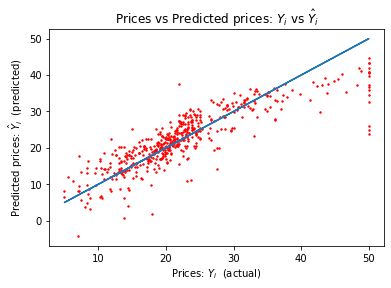

In [23]:
plt.scatter(y, reg.predict(X), s=2, c = "red")
plt.plot(y,y)
plt.xlabel("Prices: $Y_i$  (actual)")
plt.ylabel("Predicted prices: $\hat{Y}_i$  (predicted)")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

plt.show()